In [1]:
import numpy as np
import PIL
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import matplotlib
from scipy.special import fresnel

In [2]:
s2, c2 = fresnel(3)
print(s2)
print(c2)

0.49631299896737496
0.6057207892976857


(488, 648)


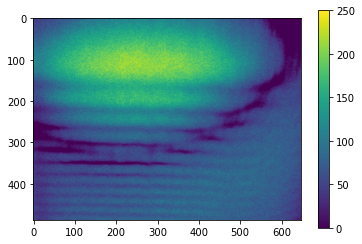

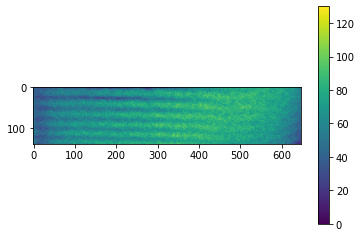

(488, 648)


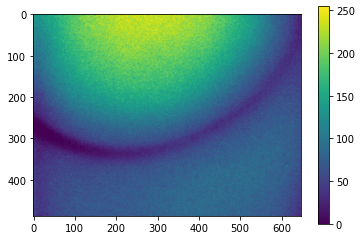

In [3]:
file1 = 'Blade_Edge\Blade_Edge_Mandar_conf30001.tif'
#file1 = 'Blade_edge_1_new_Mandar0001.tif'
image1 = np.copy(np.flipud(np.array(PIL.Image.open(file1))[:, :, 0]))
print(image1.shape)
plt.figure()
plt.imshow(image1)
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(image1[350:488])
plt.colorbar()
plt.show()

noise = 20

file2 = 'Blade_Edge\Blade_Edge_Mandar_conf3_bkgnd0001.tif'
#file2 = 'Blade_edge_1_new_bgn_Mandar0001.tif'
image2 = np.copy(np.flipud(np.array(PIL.Image.open(file2))[:, :, 0]))
print(image2.shape)
plt.figure()
plt.imshow(image2)
plt.colorbar()
plt.show()

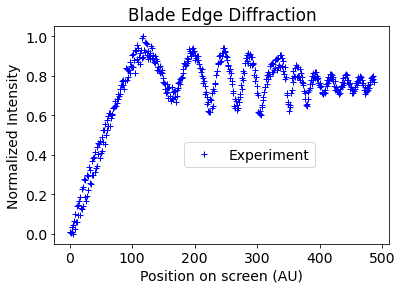

In [4]:
i1 = 0
i2 = 488
#i1 = 355
#i2 = 488
id1 = 303
id2 = 353
a = np.zeros(i2-i1)
b = np.zeros(i2-i1)
c = np.zeros(i2-i1)
ind1 = 200
ind2 = 220
for i in range (ind1, ind2):
    #c = c + (image1[i1:i2, i].astype(np.float32)/image2[i1:i2, i].astype(np.float32))/(ind2 - ind1)
    a = a + image1[i1:i2, i].astype(np.float32)/(ind2 - ind1)
    b = b + image2[i1:i2, i].astype(np.float32)/(ind2 - ind1)
d = a - b
#d = np.delete(d, np.arange(id1, id2, 1))
d[id1+1:] = 0.5*d[id1+1:] - 10
d = (d - np.min(d))/(np.max(d) - np.min(d))
plt.figure()
matplotlib.rcParams.update({'font.size': 14})
plt.plot(d, 'b+', label = 'Experiment')
plt.xlabel('Position on screen (AU)')
plt.ylabel('Normalized Intensity')
plt.title('Blade Edge Diffraction')
plt.legend(bbox_to_anchor = (0.8, 0.5))
plt.show()
#print(d)

0.06473243285999929


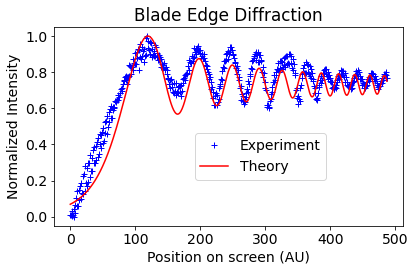

In [5]:
#Theory
ok = 0.5
x = np.linspace(-ok, 6.5, a.shape[0])
s, c = fresnel(x)
s2, c2 = fresnel(ok)
print(s2)
c0 = (1./2.)*(c + 0.5)**2 
c1 = (1./2.)*(s + 0.5)**2
I = c0 + c1
I = I/np.max(I)

plt.figure()
matplotlib.rcParams.update({'font.size': 14})
plt.plot(d, 'b+', label = 'Experiment')
plt.plot(I, 'r', label = 'Theory')
plt.xlabel('Position on screen (AU)')
plt.ylabel('Normalized Intensity')
plt.title('Blade Edge Diffraction')
plt.legend(bbox_to_anchor = (0.8, 0.5))
plt.tight_layout()
plt.savefig('D:\\Cornell\Cornell Semesters\Semester 2, Fall\'21\PHYS 6510 - Advanced Physics Lab\Experiment - Diffraction\Report\Figures\Blade_Edge.jpg')
plt.show()